# 1.4 Introduction Linear Regression #

A regression model is a statistical model of the influence of random variables on a certain random variable. If we assume that they follow a simple linear relationship, of the form:

$$
Y = \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_k X_k,
$$

then this is a linear regression model. In this case, there are $k$ *independent variables*. They are alternatively called *explanatory variables*. Sometimes, they are constants, and then they are called *constant terms*. The coefficients $\beta_i$ are the parameters of the model that have to be estimated using data.

#### Simplest Linear Model ####

The simplest cast of a linear model is $Y = \alpha + \beta X$. We will work with some data from Yahoo! Finance subsequently.

For such a simple model, using a scatter plot can aid in visualization.

In [19]:
#!pip install yfinance
#!pip install yahoofinancials
#!pip install pandas
import pandas as pd
import yfinance as yf
import numpy as np
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
from scipy.stats import linregress
pd.options.mode.chained_assignment = None 



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\jonat\miniconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:189: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\jonat\miniconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:192: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


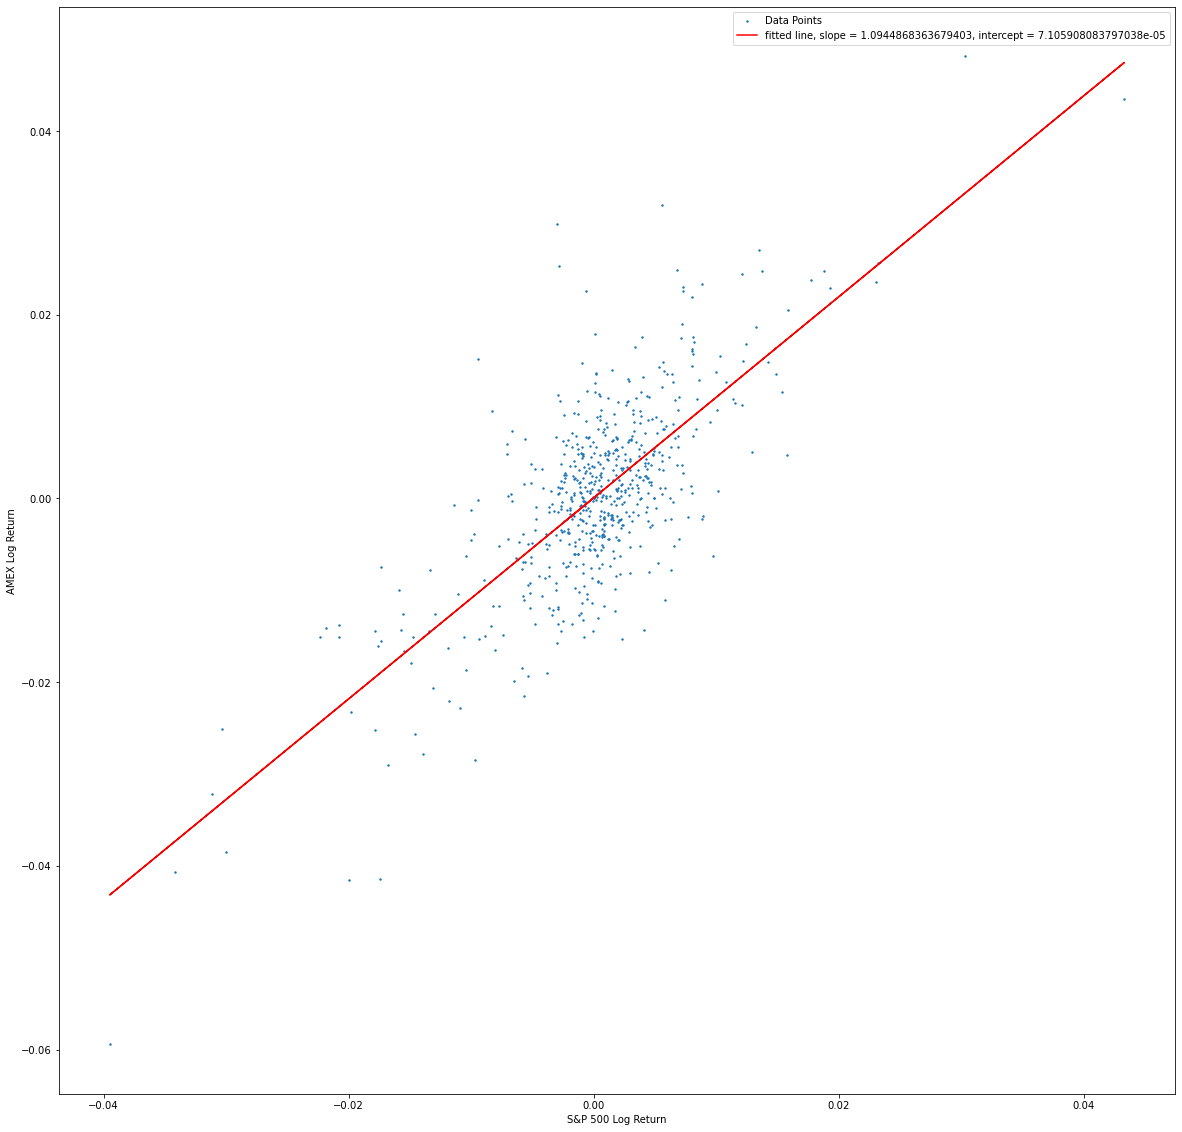

In [20]:
startdate = '2016-11-10' #Only take data after this date
enddate = '2019-05-26' #Only take data before this date

# Download AMEX data, S&P 500 Data

amex_data = yf.download('AXP')
datestotakestart = amex_data.index>startdate
datestotakeend = amex_data.index<enddate
amex_data = amex_data[np.logical_and.reduce([datestotakestart,datestotakeend])]
# print(amex_data)
amex_data["Log Return"] = np.log(amex_data["Close"]/amex_data["Open"])
amex_log_returns = amex_data[["Log Return"]].to_numpy()

SnP_data = yf.download('^GSPC')
datestotakestart = SnP_data.index>startdate
datestotakeend = SnP_data.index<enddate
SnP_data = SnP_data[np.logical_and.reduce([datestotakestart,datestotakeend])]
SnP_data["Log Return"] = np.log(SnP_data["Close"]/SnP_data["Open"])
SnP_log_returns = SnP_data[["Log Return"]].to_numpy()
# print(SnP_log_returns.shape)
# Linear Regression
res = linregress(np.transpose(SnP_log_returns), np.transpose(amex_log_returns))
# Plotting Scatterplot
plt.figure(figsize=(20, 20))
plt.scatter(SnP_log_returns,amex_log_returns,s=2,label='Data Points')
plt.plot(SnP_log_returns, res.intercept + res.slope*SnP_log_returns, 'r', label='fitted line, slope = %s, intercept = %s'%(res.slope,res.intercept))
plt.legend()
plt.xlabel('S&P 500 Log Return')
plt.ylabel('AMEX Log Return')

plt.show()

Usually, the points will not lie exactly along the linear regression line, unless they are perfectly correlated. One can include an error term in the simple linear model

$$
Y_t = \alpha + \beta X_t + \epsilon_t.
$$

$\epsilon_t$ is called the *error process*. For low correlation between $X$ and $Y$, the error process will have a relatively high variance, and similarly, a high correlation will imply that the error process has a low variance. 

We now need to introduce more notation. We adopt the hat notation $\hat{}$ to denote estimators. Then, the fitted line is denoted as

$$
\hat{Y} = \hat{\alpha} + \hat{\beta} X.
$$

The difference between $Y$ and $\hat{Y}$ is known as the *residual*, $e_t = Y_t - \hat{Y}_t$.